# Handle Class Imbalance

### Import Necessary Packages

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Preprocessed Dataset

In [4]:
df = pd.read_csv(r'C:\Users\Faizan Habib\Desktop\Emo1\prep_data.csv')

In [6]:
df.head(10)

,emotion_label,clean_content,clean_withSW_SL,clean_noSW_SL,clean_noSW_noSL
0,0,i know i was listenin to bad habit earlier and...,i know i was listenin to bad habit earlier and...,know listenin bad habit earlier started freaki...,know listenin bad habit earlier start freakin ...
1,2,layin n bed with a headache ughhhh waitin on y...,layin n bed with a headache ughh waitin on you...,layin bed headache ughh waitin call,layin bed headach ughh waitin call
2,2,funeral ceremony gloomy friday,funeral ceremony gloomy friday,funeral ceremony gloomy friday,funer ceremoni gloomi friday
3,1,wants to hang out with friends soon,wants to hang out with friends soon,wants hang friends soon,want hang friend soon
4,0,we want to trade with someone who has houston ...,we want to trade with someone who has houston ...,want trade someone houston tickets no one,want trade someon houston ticket no one
5,2,re pinging why didn t you go to prom bc my bf ...,re pinging why didn t you go to prom bc my bf ...,pinging go prom bc bf like friends,ping go prom bc bf like friend
6,2,i should be sleep but im not thinking about an...,i should be sleep but im not thinking about an...,sleep im not thinking old friend want married ...,sleep im not think old friend want marri damn ...
7,2,hmmm is down,hmm is down,hmm,hmm
8,2,charlene my love i miss you,charlene my love i miss you,charlene love miss,charlen love miss
9,2,i m sorry at least it s friday,i m sorry at least it s friday,sorry least friday,sorri least friday


### Draw the Pie Chart

In [19]:
# Number of unique emotions
labels = df.emotion_label.unique()

In [55]:
# Count of each type
values = df.emotion_label.value_counts()

In [63]:
# Count of each type
class_counts = df['emotion_label'].value_counts()

In [59]:
# Percentage of each type
class_percentages = (class_counts / class_counts.sum()) * 100

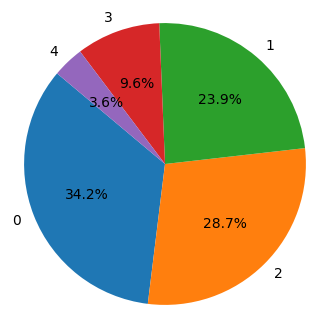

In [26]:
# Pie Chart based on size of each type
plt.figure(figsize=(4,4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

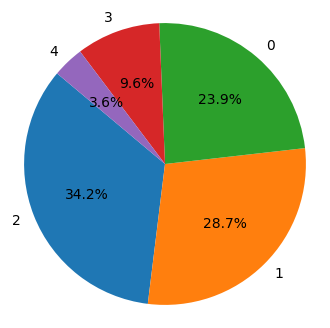

In [64]:
# Pie Chart based on count of each type
plt.figure(figsize=(4,4))
# plt.pie(class_counts, labels=class_percentages, autopct='%1.1f%%', startangle=140)
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

### Downsampling Majority Classes

In [39]:
import pandas as pd
from sklearn.utils import resampl

# Determine the size of the minority class (class 4)
minority_class_size = df[df['emotion_label'] == 4].shape[0]

# Separate majority and minority classes
majority_classes = df[df['emotion_label'] != 4]
minority_class = df[df['emotion_label'] == 4]

# Downsample majority classes to match the size of the minority class
majority_downsampled = pd.concat([
    resample(majority_classes[majority_classes['emotion_label'] == label],
             replace=False,
             n_samples=minority_class_size,
             random_state=42)
    for label in range(4)
])

# Combine minority class with downsampled majority classes
df_downsampled = pd.concat([majority_downsampled, minority_class])

# Reset the index
df_downsampled.reset_index(drop=True, inplace=True)

# Display class distribution after under-sampling
print(df_downsampled['emotion_label'].value_counts())


emotion_label
0    1431
1    1431
2    1431
3    1431
4    1431
Name: count, dtype: int64


In [43]:
df_downsampled.reset_index(drop=True, inplace=True)

In [45]:
# Save the Downsampled DataFrame as a new dataset
df_downsampled.to_csv(r'C:\Users\Faizan Habib\Desktop\Emo1\downsampled_dataset.csv', index=False)

### Oversampling Minority Classes

In [67]:
import pandas as pd
from sklearn.utils import resample

# Determine the size of the majority class
majority_class_size = df['emotion_label'].value_counts().max()

# Separate majority and minority classes
majority_class = df[df['emotion_label'] == 2] 
minority_classes = df[df['emotion_label'] != 2]

# Oversample minority classes to match the size of the majority class
minority_oversampled = pd.concat([
    resample(minority_classes[minority_classes['emotion_label'] == label],
             replace=True,
             n_samples=majority_class_size,
             random_state=42)
    for label in minority_classes['emotion_label'].unique()
])

# Combine majority class with oversampled minority classes
df_oversampled = pd.concat([majority_class, minority_oversampled])

# Reset the index
df_oversampled.reset_index(drop=True, inplace=True)

# Display class distribution after over-sampling
print(df_oversampled['emotion_label'].value_counts())

emotion_label
2    13596
0    13596
1    13596
3    13596
4    13596
Name: count, dtype: int64


In [69]:
# Save the Oversampled DataFrame as a new dataset
df_oversampled.to_csv('oversampled_dataset.csv', index=False)